In [2]:
# ==============================
# Análise Exploratória dos Dados
# ==============================

# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set(style="whitegrid")
%matplotlib inline


In [3]:
# ------------------------------
# Carregar o dataset
# ------------------------------
data_path = "../data/star_dataset.csv"
df = pd.read_csv(data_path)

# Visualizar as primeiras linhas
df.head()


,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class
0,Altair,16.594171,9.979192,1.632650,7509.294247,A7V
1,Deneb,2600.490723,196002.627856,202.970526,8503.284796,A2Ia
2,Barnard's Star,6.052616,4.893716,0.222711,3165.959639,M4Ve
3,Polaris,322.601002,2196.241934,37.546813,6048.326915,F7Ib
4,Barnard's Star,5.902392,-1.496486,0.192359,3130.602069,M4Ve


In [3]:
# ------------------------------
# Informações gerais do dataset
# ------------------------------
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Distance (ly)      1000 non-null   float64
 2   Luminosity (L/Lo)  1000 non-null   float64
 3   Radius (R/Ro)      1000 non-null   float64
 4   Temperature (K)    1000 non-null   float64
 5   Spectral Class     1000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 47.0+ KB


In [4]:
# Estatísticas descritivas
df.describe()


,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,295.505327,19644.909442,86.960696,9983.486779
std,541.478403,42223.595017,213.850005,7906.973529
min,3.877798,-4.993141,0.068087,2750.183163
25%,11.716853,10.441039,1.664479,3940.020856
50%,52.031435,171.097809,5.845444,7379.007975
75%,322.865874,10500.577117,33.719778,12055.975095
max,2600.490723,196004.854081,887.097936,28044.279272


In [ ]:
# ------------------------------
# Criar classe espectral principal
# ------------------------------
# Usamos apenas a primeira letra (B, A, F, G, K, M)
df["Spectral_Class_Main"] = df["Spectral Class"].str[0]

# Verificar classes existentes
df["Spectral_Class_Main"].value_counts()


Spectral_Class_Main
A    289
B    252
M    239
K     80
G     75
F     65
Name: count, dtype: int64

/tmp/ipykernel_58913/3706712681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


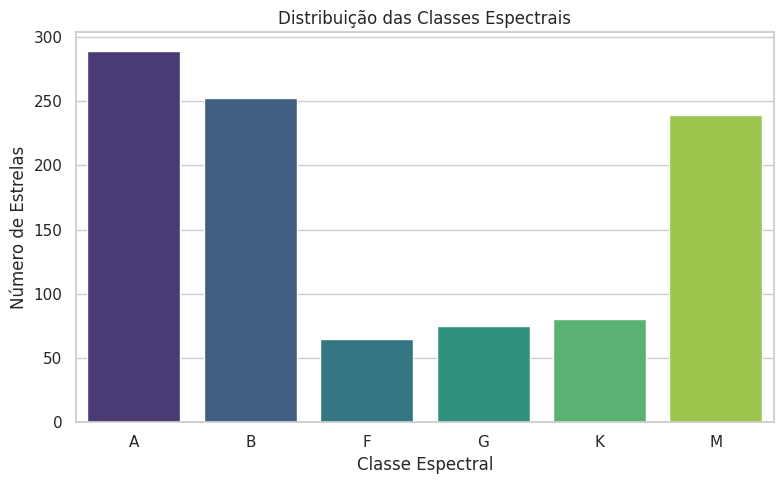

In [6]:
# ------------------------------
# Distribuição das classes espectrais
# ------------------------------
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Spectral_Class_Main",
    order=sorted(df["Spectral_Class_Main"].unique()),
    palette="viridis"
)

plt.title("Distribuição das Classes Espectrais")
plt.xlabel("Classe Espectral")
plt.ylabel("Número de Estrelas")

plt.tight_layout()
plt.savefig("spectral_class_distribution.png", dpi=300)
plt.show()


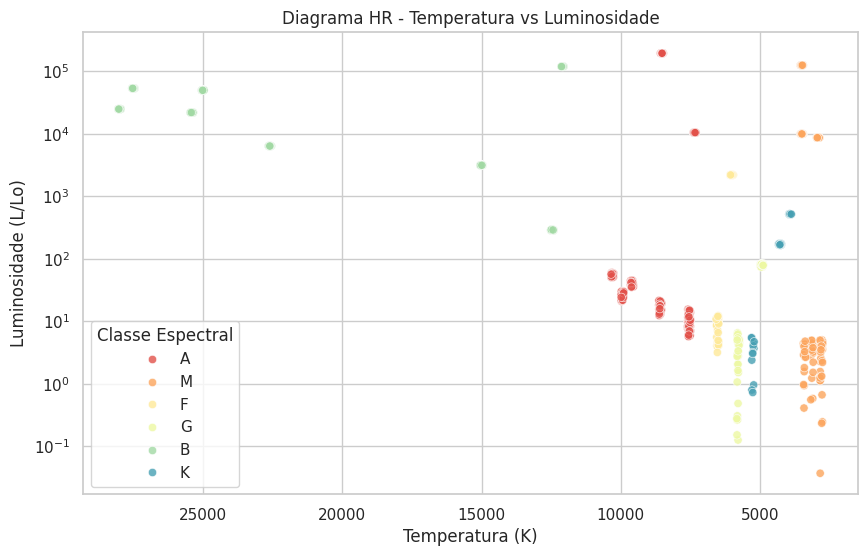

In [14]:
# ------------------------------
# Diagrama HR
# ------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Temperature (K)",
    y="Luminosity (L/Lo)",
    hue="Spectral_Class_Main",
    palette="Spectral",
    alpha=0.8
)

# Convenção astronômica
plt.gca().invert_xaxis()
plt.yscale("log")

plt.title("Diagrama HR - Temperatura vs Luminosidade")
plt.xlabel("Temperatura (K)")
plt.ylabel("Luminosidade (L/Lo)")
plt.legend(title="Classe Espectral")
plt.show()
